Haberman's Dataset:

The data was collected in a study conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the  survival of patients who had undergone surgery for breast cancer.

Attribute Information:
Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

Sample size=307


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

h=['Age','Year','Axi','Survival']
haberman= pd.read_csv("C:\Users\DivyaB\Desktop\haberman.csv",names=h)

In [26]:
print haberman.columns

Index([u'Age', u'Year', u'Axi', u'Survival'], dtype='object')


In [27]:
#The ages of the people tested lied between 30-83 years
#0-52 number of axilliary nodes were detected 
haberman.describe()

,Age,Year,Axi,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [32]:
#An imbalanced dataset
#225 people survived for 5 or more years
#81 people survived for less than 5 years 
haberman['Survival'].value_counts()

1    225
2     81
Name: Survival, dtype: int64

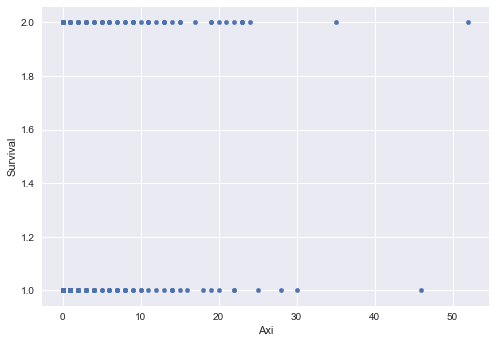

In [29]:
# It seems that there is no correlation between the number of axilliary nodes and survival
haberman.plot(kind='scatter',x='Axi',y='Survival')
plt.show()

In [31]:
#Number of people that survived for 5 or more years=225
#Number of people that survived for less than 5 years=81

haberman['Survival'].value_counts()

1    225
2     81
Name: Survival, dtype: int64

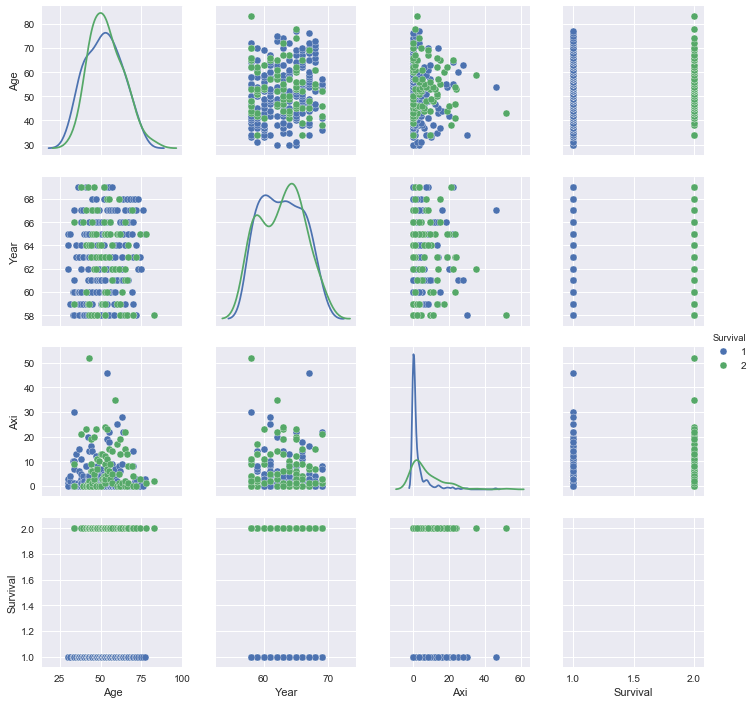

In [40]:
sns.pairplot(haberman, hue="Survival", diag_kind="kde");
plt.show()

E:\Anaconda\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
E:\Anaconda\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


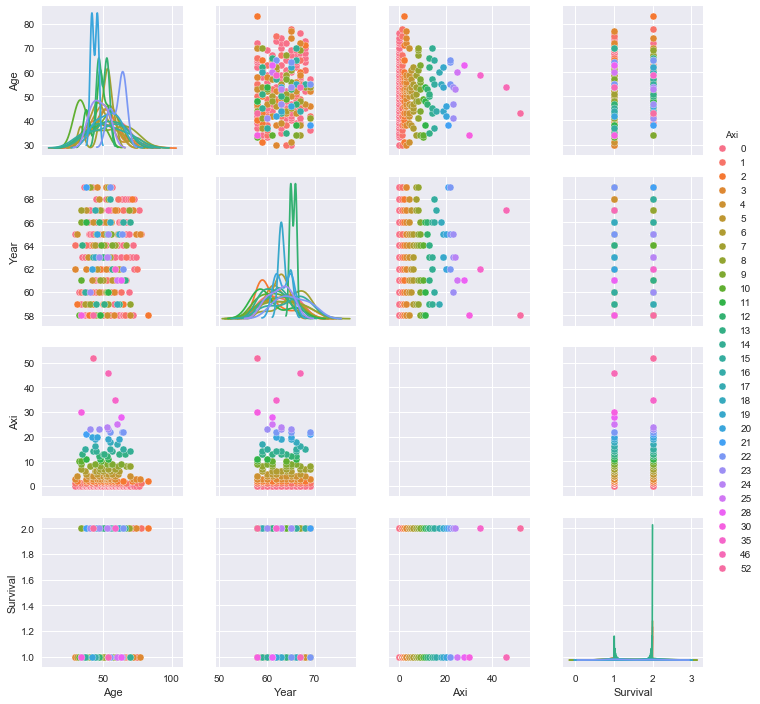

In [48]:
sns.pairplot(haberman, hue="Axi", diag_kind="kde");
plt.show()

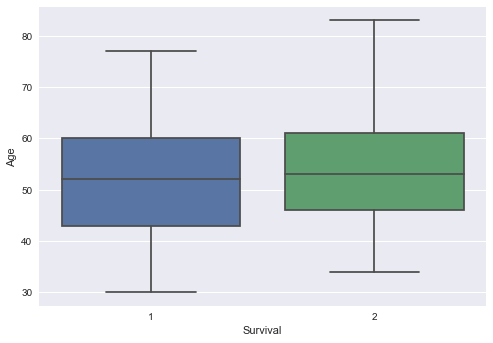

In [53]:
#Clearly no classification can be made based on age since the patients belonging to the same age either survived more than 5 years or less
#The plot is gaussian or denser in the middle because of the general population density and because of the nature of the sample
sns.boxplot(x='Survival',y='Age', data=haberman)
plt.show()

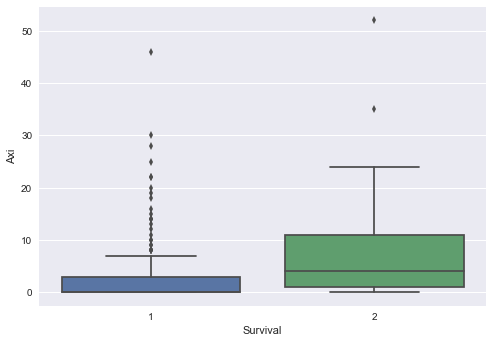

In [54]:
# Looks like generally, the patients with lesser number of axillary nodes had more chances of surviving for long than the people who had more but again there are points throughout the range indicating that this is not a classifying measure.  
sns.boxplot(x='Survival',y='Axi', data=haberman)
plt.show()

In [50]:
df=haberman[haberman['Survival']==2]
print df

     Age  Year  Axi  Survival
7     34    59    0         2
8     34    66    9         2
24    38    69   21         2
34    39    66    0         2
43    41    60   23         2
44    41    64    0         2
45    41    67    0         2
53    42    69    1         2
54    42    59    0         2
62    43    58   52         2
63    43    59    2         2
64    43    64    0         2
65    43    64    0         2
73    44    64    6         2
74    44    58    9         2
75    44    63   19         2
80    45    65    6         2
81    45    66    0         2
82    45    67    1         2
89    46    58    2         2
90    46    69    3         2
91    46    62    5         2
92    46    65   20         2
96    47    63   23         2
97    47    62    0         2
98    47    65    0         2
107   48    58   11         2
108   48    58   11         2
109   48    67    7         2
114   49    63    0         2
..   ...   ...  ...       ...
190   56    65    9         2
191   56  

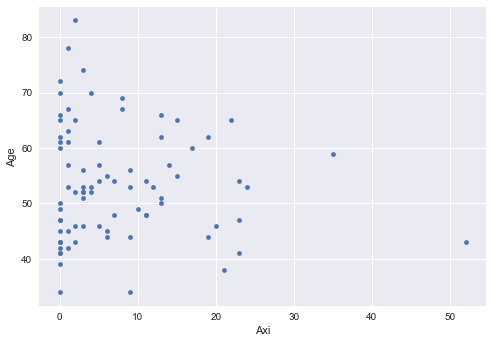

In [51]:
# Trying to see that the patients who survived for less than 5 years, fall in which age groups and had how many axillary nodes and/
# if there is any correlation between the two
#Most of the patients in this cattegory had lymph nodes between 0-25
df.plot(kind='scatter',x='Axi',y='Age')
plt.show()

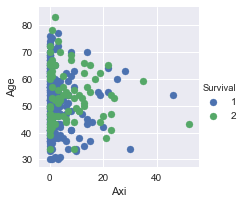

In [52]:
sns.FacetGrid(haberman, hue="Survival") \
   .map(plt.scatter,"Axi","Age") \
   .add_legend();
plt.show();


From the above analysis on the given data, I could not find any strong correlation between the given set of variables so that any prediction of whether a person would survive more given her traits can be made.